In [1]:

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.keras.models import Sequential
import time
import cv2
from tensorflow.keras.applications import VGG16

In [ ]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 77s 0us/step


In [2]:

# data_dir = tf.keras.utils.get_file('F:\projects\Crowed_Monetering\\flower_photos', origin=dataset_url)
data_dir = "F:\projects\Crowed_Monetering\photos_spp"
data_dir=pathlib.Path(data_dir).with_suffix('')

In [3]:
image_count= len(list(data_dir.glob('*/*.jpg')))
print(image_count)

102


In [7]:
img = cv2.imread("F:/projects/Crowed_Monetering/photos_spp/Shivam/IMG-20240415-WA0088.jpg")

In [31]:
# import PIL.Image


# roese = list(data_dir.glob('Priyanav/*'))
# PIL.Image.open(str(roese[1]))

In [12]:
tulips = list(data_dir.glob('tulips/*'))

PIL.Image.open(str(tulips[0]))

IndexError: list index out of range

In [4]:
# parameters 

image_height= 180
image_width= 180


In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                         validation_split=0.2,
                                                         subset="training",
                                                         shuffle=True,
                                                         seed=128,
                                                         image_size=(image_height, image_width),
                                                             )

Found 102 files belonging to 3 classes.
Using 82 files for training.


In [6]:
val_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                         validation_split=0.2,
                                                         subset="validation",
                                                         shuffle=True,
                                                         seed=128,
                                                         image_size=(image_height, image_width),
                                                             )

Found 102 files belonging to 3 classes.
Using 20 files for validation.


In [7]:
class_name= train_data.class_names
print(class_name)

['Priyanav', 'Priyanshu', 'Shivam']


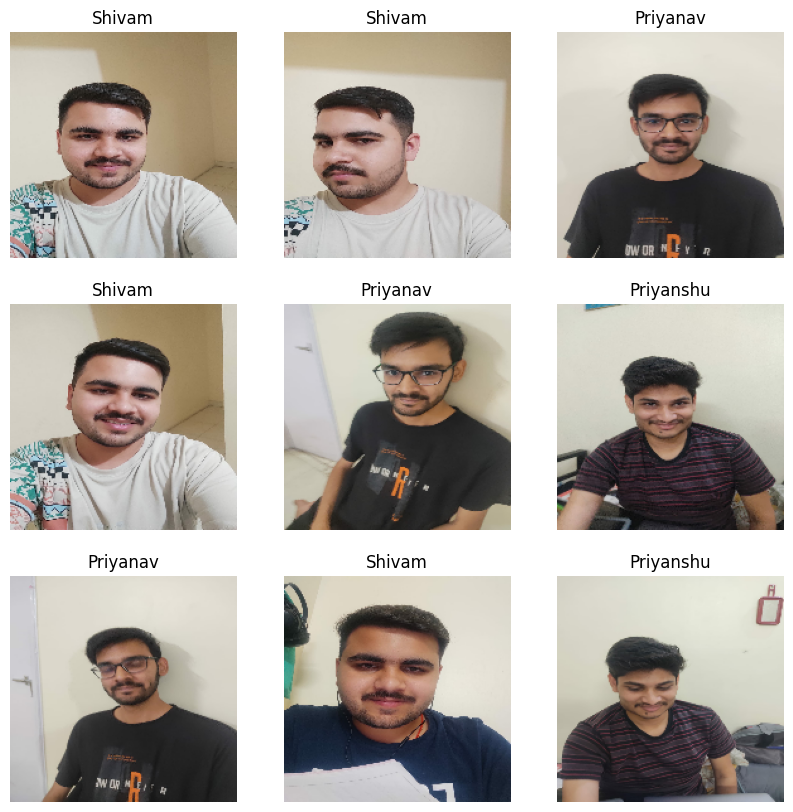

In [8]:
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")

In [9]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
normalized_data = train_data.map(lambda x,y: (normalization_layer(x),y))
image_batch , labels_batch = next(iter(normalized_data))
first_image = image_batch[0]
print(np.min(first_image) , np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


0.050656788 1.0


In [12]:
num_classes = len(class_name)
print(num_classes)

3


In [13]:
data_agumentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical",input_shape=(image_height,image_width,3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
        
    ]
)

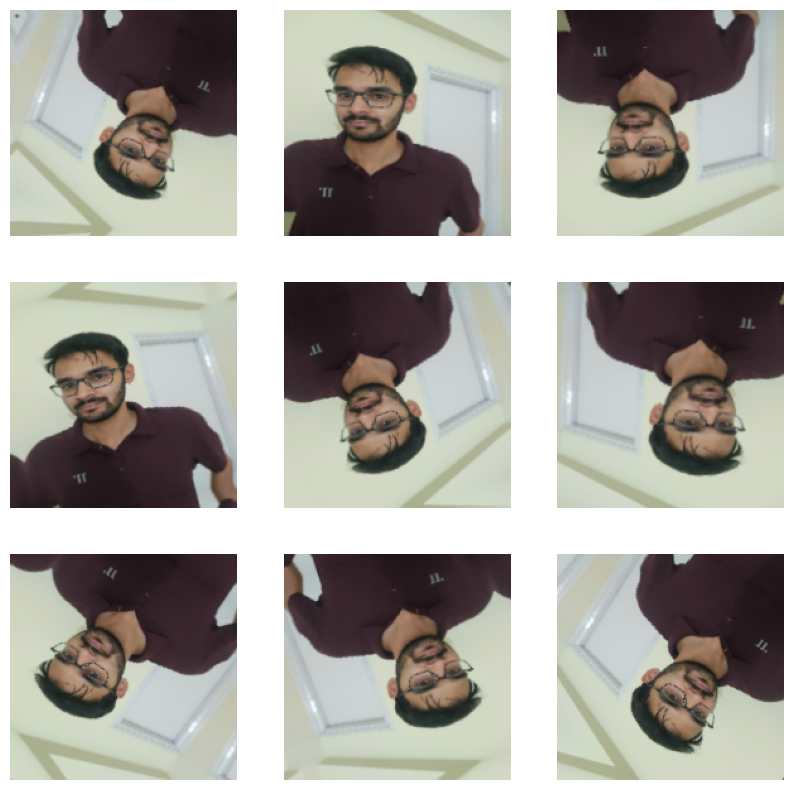

In [14]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_agumentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [49]:
model = Sequential([
  data_agumentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [52]:
epochs = 40
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/40


3/3 [==============================] - 4s 463ms/step - loss: 1.6647 - accuracy: 0.4268 - val_loss: 2.1231 - val_accuracy: 0.3500
Epoch 2/40
3/3 [==============================] - 1s 393ms/step - loss: 1.3366 - accuracy: 0.4146 - val_loss: 1.2186 - val_accuracy: 0.3000
Epoch 3/40
3/3 [==============================] - 1s 380ms/step - loss: 0.9046 - accuracy: 0.6341 - val_loss: 0.9412 - val_accuracy: 0.6000
Epoch 4/40
3/3 [==============================] - 1s 375ms/step - loss: 0.8572 - accuracy: 0.7561 - val_loss: 0.8856 - val_accuracy: 0.6000
Epoch 5/40
3/3 [==============================] - 1s 384ms/step - loss: 0.7120 - accuracy: 0.8902 - val_loss: 0.7815 - val_accuracy: 0.6000
Epoch 6/40
3/3 [==============================] - 2s 407ms/step - loss: 0.5317 - accuracy: 0.8780 - val_loss: 0.7618 - val_accuracy: 0.5500
Epoch 7/40
3/3 [==============================] - 2s 406ms/step - loss: 0.4217 - accuracy: 0.8659 - val_loss: 0.6950 - val_accuracy: 0.6000
Epoch 8/40
3/3 [===============

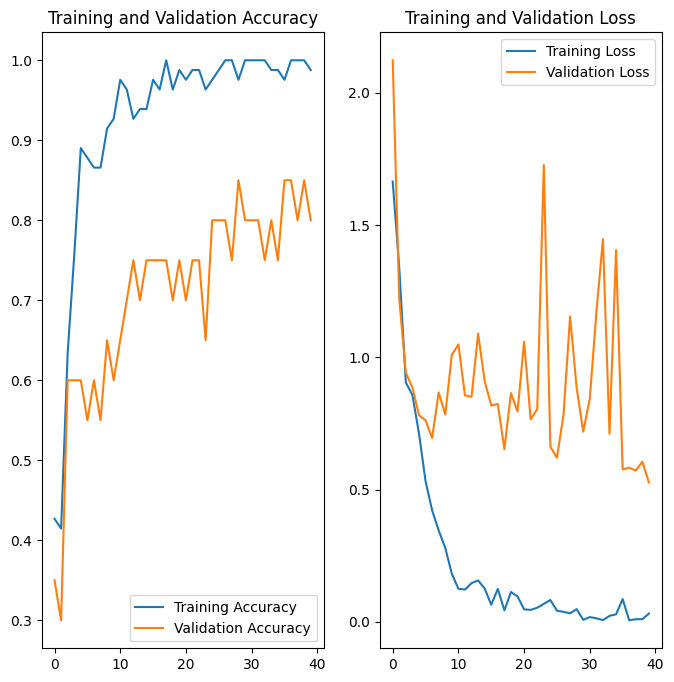

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
path= "F:\projects\Crowed_Monetering\photos_spp\Priyanav\IMG-20240413-WA0005.jpg"

img = tf.keras.utils.load_img(
    path, target_size=(image_height, image_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

NameError: name 'model' is not defined

In [62]:
path= "F:\projects\Crowed_Monetering\photos_spp\Shivam\IMG-20240413-WA0023.jpg"

img = tf.keras.utils.load_img(
    path, target_size=(image_height, image_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()



In [92]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [16]:
TF_MODEL_FILE_PATH = 'F:\projects\Crowed_Monetering\model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [17]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_8_input'], 'outputs': ['outputs']}}

In [18]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [19]:
predictions_lite = classify_lite(sequential_8_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [20]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to Priyanav with a 97.06 percent confidence.


In [21]:
class_name

['Priyanav', 'Priyanshu', 'Shivam']

In [23]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
  ret,frame = cap.read()
  
  
  resized_img=cv2.resize(frame,(image_height,image_width))
  cv2.imshow("img",resized_img)
  img_array = tf.keras.utils.img_to_array(resized_img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions_lite = classify_lite(sequential_8_input=img_array)['outputs']
  score_lite = tf.nn.softmax(predictions_lite)
  # score = tf.nn.softmax(predictions[0])
  tmep=class_name[np.argmax(score_lite)]
 
  
  
  print(tmep)  
  
  
      
         
  if cv2.waitKey(10) & 0xFF == ord("c"):
        break
  time.sleep(0.1)   

cap.release()
cv2.destroyAllWindows()

Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Priyanshu
Shivam
Priyanshu
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam
Shivam


KeyboardInterrupt: 

: 

In [69]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(image_height, image_width, 3))
for layer in base_model.layers:
    layer.trainable = False


In [70]:
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.5)(x)  # Experiment with dropout rate
predictions = layers.Dense(num_classes, activation="softmax")(x)

In [71]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)